**가중치 시각화**

합성곱 층은 여러개의 필터를 사용해 이미지의 특징을 학습.

각 필터는 커널이라 부르는 가중치와 절편을 가지고 있고

가중치는 입력 이미지의 2차원 영역에 적용되어 특정한 특징(뭔지는모름)을 크게 두두러지게 표현하는 역활을 한다.

절편은 시각적으로 의미를 가지지는 않는다.

예를 들어 예제로 사용한 핸드백의 경우 둥근 모서리가 있는 영역에서 가중치가 크게 활성화 되게 그렇지 않은 부분에서는 낮은 값을 만든다.

In [ ]:
from tensorflow import keras
!wget https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.keras

--2024-09-30 02:34:46--  https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.keras
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.keras [following]
--2024-09-30 02:34:47--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.keras
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4038273 (3.9M) [application/octet-stream]
Saving to: ‘best-cnn-model.keras’

best-cnn-model.kera 100%[===================>]   3.85M  --.-KB/s    in 0.02s   

2024-09-30 02:34:47 (241 MB/s) - ‘best-cnn-model.keras’ saved [4038273/4038273]



In [ ]:
model = keras.models.load_model('best-cnn-model.keras')

In [ ]:
model.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [ ]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [ ]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.014383553 0.23351653


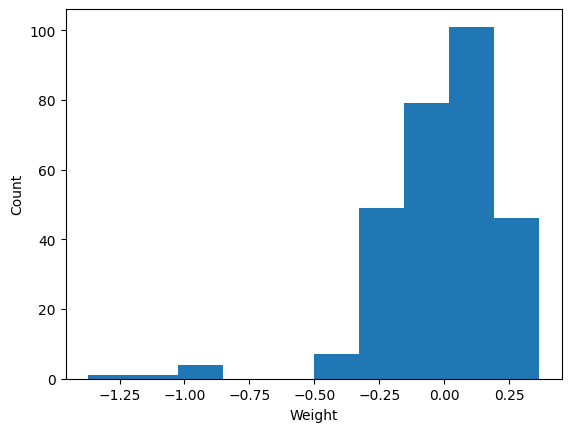

In [ ]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()

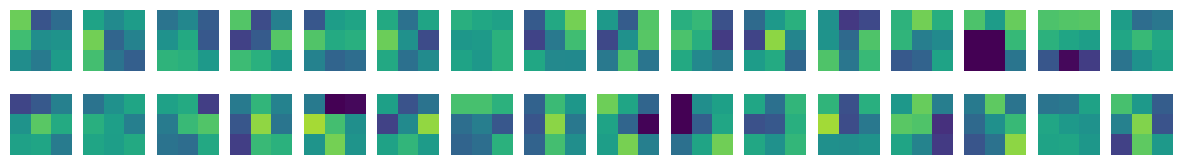

In [ ]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0, i*16 + j], vmin=-0.5, vmax = 0.5)
        axs[i, j].axis('off')
plt.show()

In [14]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (28, 28, 1)))

In [16]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [17]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

0.0012886714 0.08126238


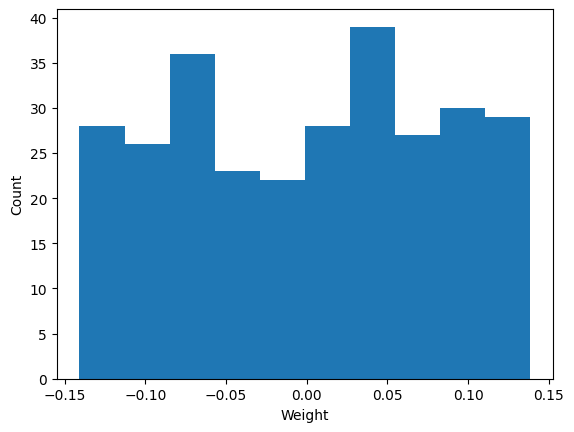

In [18]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()

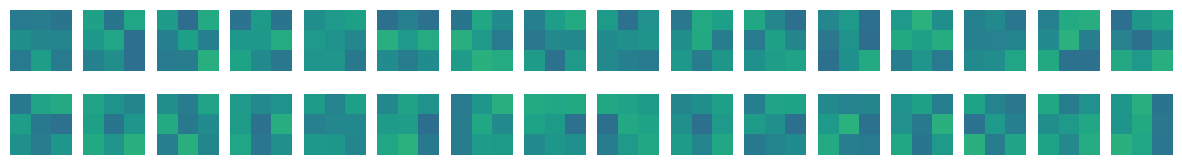

In [19]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

In [21]:
print(model.inputs)

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=input_layer>]


In [25]:
conv_acti = keras.Model(model.inputs, model.layers[0].output)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


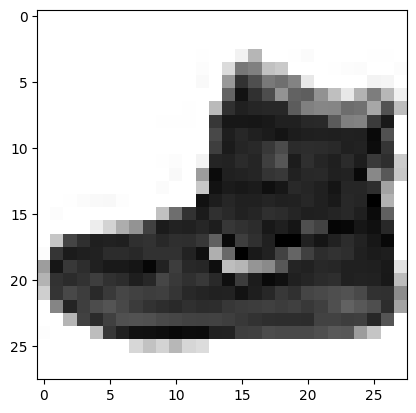

In [26]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap = 'gray_r')
plt.show()

In [27]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0

In [28]:
feature_maps = conv_acti.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


In [29]:
print(feature_maps.shape)

(1, 28, 28, 32)


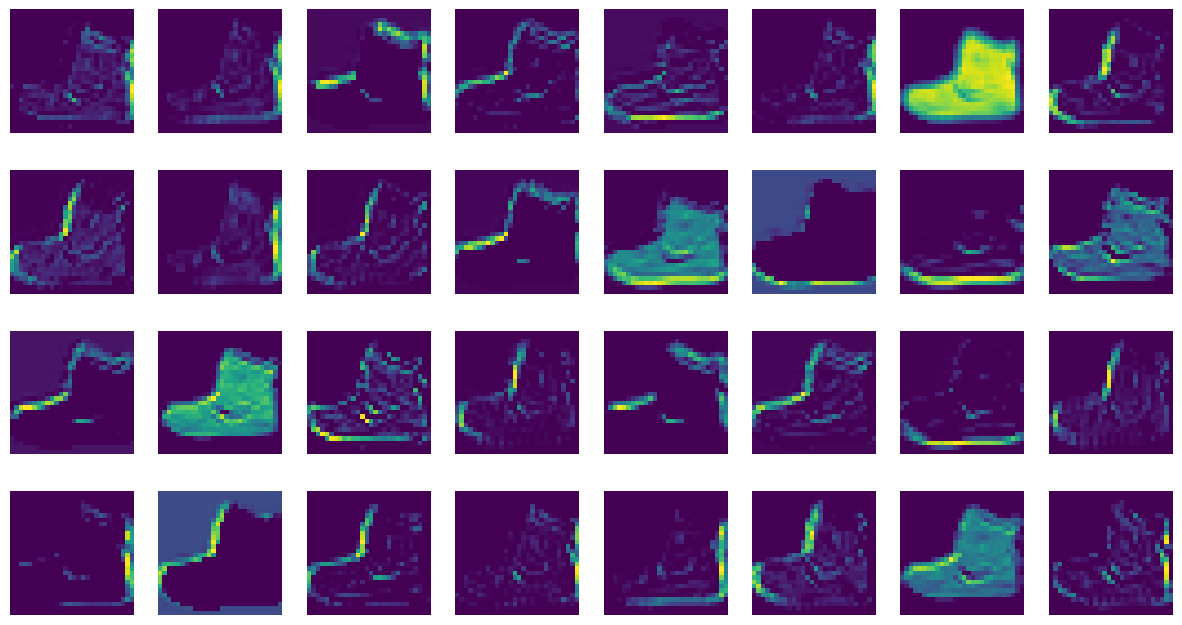

In [30]:
fig, axs = plt.subplots(4, 8, figsize = (15, 8))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')
plt.show()

In [32]:
conv2_acti = keras.Model(model.inputs, model.layers[2].output)

In [33]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv2_acti.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


In [34]:
print(feature_maps.shape)

(1, 14, 14, 64)


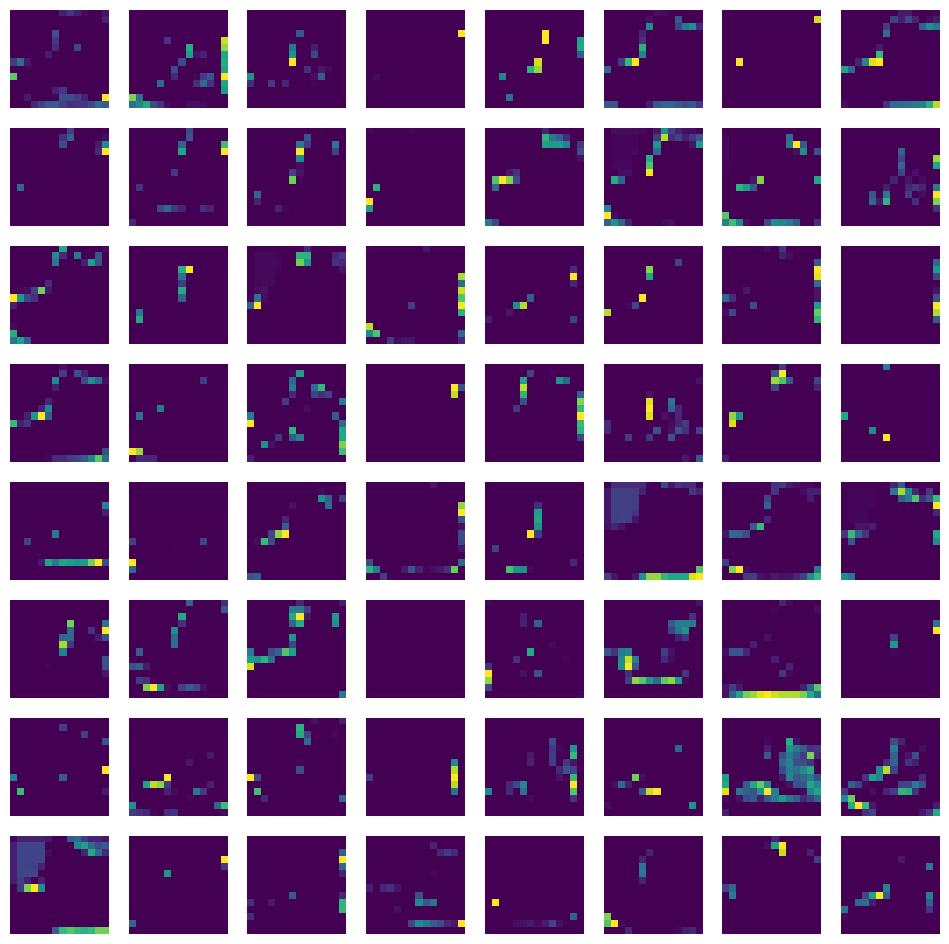

In [35]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()